In [18]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from PIL import Image
from wordcloud import WordCloud
import plotly.express as px
import psutil

%matplotlib inline

# load my life data
log_data = pd.read_excel('captains_log.xlsx')

# Who am I?

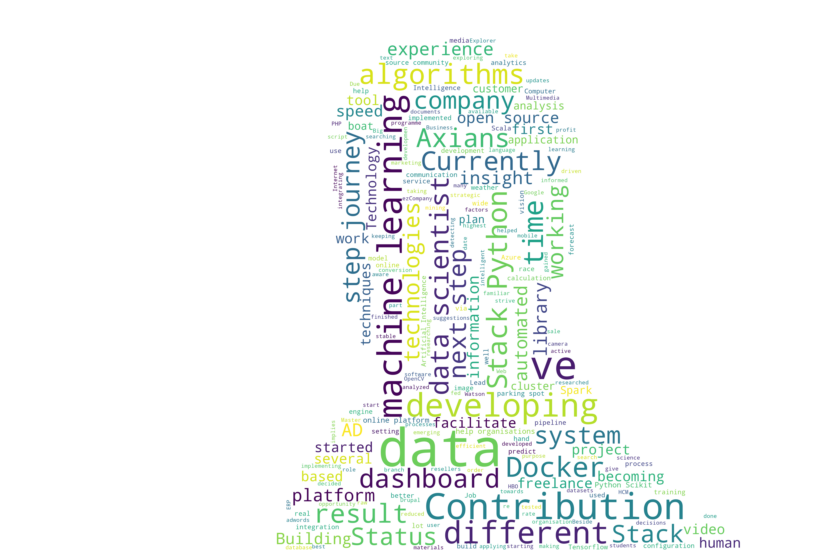

In [12]:
# # grab the text
# this_is_me = log_data['description'].str.cat(sep=' ')

# # get the mask
# mask = np.array(Image.open('WillemHiRes.jpg'))

# # generate the wordcloud
# wordcloud = WordCloud(background_color="white", width=800, height=400,  mask=mask).generate(this_is_me)

# # show the wordcloud
# plt.figure(figsize=[20,10])
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# Where have i worked?

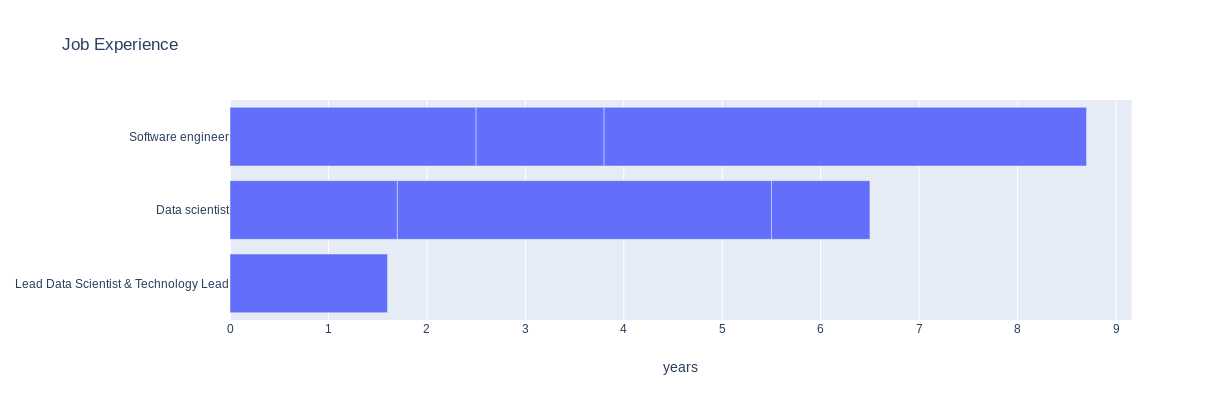

In [23]:
def duration(df, end, start):
    # set missing end dates at now
    df[end] = df[end].fillna(pd.datetime.now())
    
    # calculate the duration
    df['years'] = round((df[end] - df[start]) / np.timedelta64(1,'Y'), 1)
    
    # return the dataframe
    return df
pd.DataFrame.duration = duration

# process the data
experience = log_data[log_data['type'] == 'experience']\
    .sort_values(by='when', ascending=False)\
    .duration('until', 'when')\
    .drop(columns=['type', 'until', 'when'])

# generate a barchart
px.bar(experience, 
    x="years", 
    y="what", 
    orientation='h',
    hover_data=["where"],
    height=400,
    title='Job Experience'
)\
.update_yaxes(title_text=None)\
.show()

## What have i done?

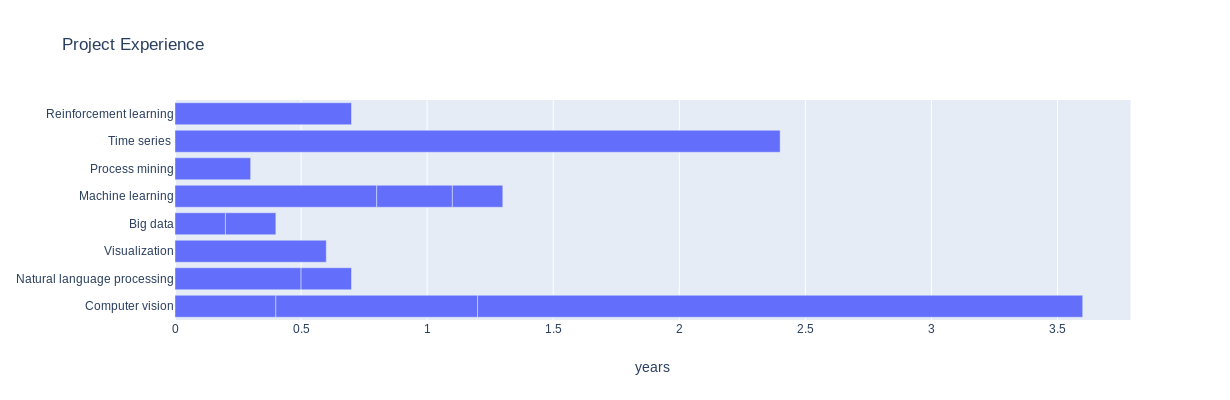

In [14]:
# process the data
projects = log_data[log_data['type'] == 'project']\
    .sort_values(by='when', ascending=False)\
    .duration('until', 'when')\
    .drop(columns=['type', 'until', 'when'])

# generate a barchart
px.bar(projects, 
    x="years", 
    y="what", 
    orientation='h',
    hover_data=["where"],
    height=400,
    title='Project Experience'
)\
.update_yaxes(title_text=None)\
.show()

# What have i studied?

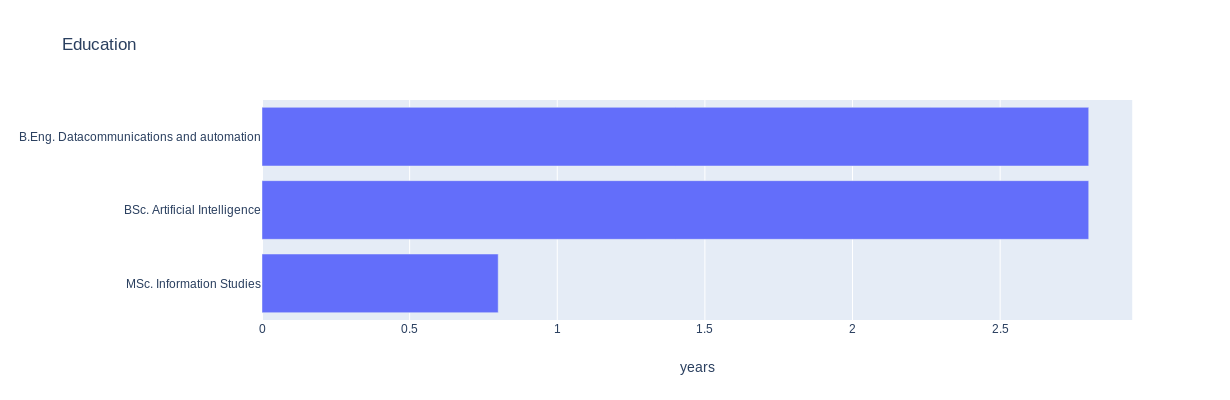

In [15]:
# process the data
education = log_data[log_data['type'] == 'education']\
    .sort_values(by='when', ascending=False)\
    .duration('until', 'when')\
    .drop(columns=['type', 'until', 'when'])

# generate a barchart
px.bar(education, 
    x="years", 
    y="what", 
    orientation='h',
    hover_data=["where"],
    height=400,
    title='Education'
)\
.update_yaxes(title_text=None)\
.show()

# What can i do?